In [ ]:
#install splot;The Spot Package allows you to create publish-ready 
# static plots and interactive visualizations for quick repetition and spatial data exploration.
pip install splot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#contextily is a small Python 3 (3.7 and above) package to retrieve tile maps
# from the internet. It can add those tiles as basemap to matplotlib figures or 
# write tile maps to disk into geospatial raster files.
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%matplotlib inline


import seaborn as sns
import pandas as pd
import pysal as ps 
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import esda
from pysal.lib import weights
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import contextily as ctx


In [ ]:
#read the shp file
d_atr=gp.read_file(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\GA LAB\anju\pylab1\Sample_Data_Geopandas_2022\district.shp")
d_atr

,AREA,PERIMETER,GEODIST_ID,Name,District,State,geometry
0,0.168803,3.053012,1,Kasaragod,KSD,Kerala,"POLYGON ((74.94578 12.57147, 74.94448 12.57494..."
1,0.248059,2.787290,2,Kannur,KNR,Kerala,"POLYGON ((75.42784 12.29307, 75.42810 12.29323..."
2,0.178607,2.495196,3,Wayanad,WYD,Kerala,"POLYGON ((75.92936 11.93514, 75.93295 11.93469..."
3,0.193825,2.570209,4,Kozhikode,KKD,Kerala,"POLYGON ((75.75937 11.79730, 75.76196 11.79725..."
4,0.296408,3.492978,5,Malappuram,MLP,Kerala,"POLYGON ((76.24221 11.52130, 76.24353 11.51994..."
5,0.371717,4.766361,6,Palakkad,PKD,Kerala,"POLYGON ((76.44852 11.19700, 76.45201 11.19457..."
6,0.246380,3.443637,7,Thrissur,THR,Kerala,"POLYGON ((76.16014 10.70205, 76.16122 10.70243..."
7,0.365632,4.938483,8,Idukki,IDK,Kerala,"POLYGON ((76.79847 10.06109, 76.79912 10.06117..."
8,0.248644,3.491411,9,Ernakulam,EKM,Kerala,"POLYGON ((76.89947 10.25507, 76.90057 10.25363..."
9,0.116386,2.581779,10,Alapuzha,ALP,Kerala,"POLYGON ((76.37882 9.83945, 76.37931 9.83914, ..."


In [ ]:
#read the csv file
d_atr2=pd.read_csv(r"C:\Users\Ahammad Sahil\Desktop\SEM 2\.Files\1. csv\covid19.csv")
d_atr2

,District,Confirmed,Death,Active
0,EKM,895800,8262,4087
1,TVM,711679,8414,2371
2,KTM,453041,4528,1389
3,KKD,675635,6343,1149
4,THR,672302,7451,639
5,PTA,268645,2518,632
6,ALP,391343,5249,494
7,PKD,450345,5804,403
8,IDK,210258,1513,397
9,KLM,512156,6522,317


In [ ]:
#join attribute of shp and scv file using .merge function
attribute_join=d_atr.merge(d_atr2,on='District') 

In [ ]:
attribute_join

,AREA,PERIMETER,GEODIST_ID,Name,District,State,geometry,Confirmed,Death,Active
0,0.168803,3.053012,1,Kasaragod,KSD,Kerala,"POLYGON ((74.94578 12.57147, 74.94448 12.57494...",166751,1391,90
1,0.248059,2.787290,2,Kannur,KNR,Kerala,"POLYGON ((75.42784 12.29307, 75.42810 12.29323...",349531,4425,119
2,0.178607,2.495196,3,Wayanad,WYD,Kerala,"POLYGON ((75.92936 11.93514, 75.93295 11.93469...",168540,974,87
3,0.193825,2.570209,4,Kozhikode,KKD,Kerala,"POLYGON ((75.75937 11.79730, 75.76196 11.79725...",675635,6343,1149
4,0.296408,3.492978,5,Malappuram,MLP,Kerala,"POLYGON ((76.24221 11.52130, 76.24353 11.51994...",647640,6435,264
5,0.371717,4.766361,6,Palakkad,PKD,Kerala,"POLYGON ((76.44852 11.19700, 76.45201 11.19457...",450345,5804,403
6,0.246380,3.443637,7,Thrissur,THR,Kerala,"POLYGON ((76.16014 10.70205, 76.16122 10.70243...",672302,7451,639
7,0.365632,4.938483,8,Idukki,IDK,Kerala,"POLYGON ((76.79847 10.06109, 76.79912 10.06117...",210258,1513,397
8,0.248644,3.491411,9,Ernakulam,EKM,Kerala,"POLYGON ((76.89947 10.25507, 76.90057 10.25363...",895800,8262,4087
9,0.116386,2.581779,10,Alapuzha,ALP,Kerala,"POLYGON ((76.37882 9.83945, 76.37931 9.83914, ...",391343,5249,494


In [ ]:
#drop the unwanted coloumn using .drop
df=attribute_join.drop(['AREA','PERIMETER','GEODIST_ID'],axis=1)

In [ ]:
df

,Name,District,State,geometry,Confirmed,Death,Active
0,Kasaragod,KSD,Kerala,"POLYGON ((74.94578 12.57147, 74.94448 12.57494...",166751,1391,90
1,Kannur,KNR,Kerala,"POLYGON ((75.42784 12.29307, 75.42810 12.29323...",349531,4425,119
2,Wayanad,WYD,Kerala,"POLYGON ((75.92936 11.93514, 75.93295 11.93469...",168540,974,87
3,Kozhikode,KKD,Kerala,"POLYGON ((75.75937 11.79730, 75.76196 11.79725...",675635,6343,1149
4,Malappuram,MLP,Kerala,"POLYGON ((76.24221 11.52130, 76.24353 11.51994...",647640,6435,264
5,Palakkad,PKD,Kerala,"POLYGON ((76.44852 11.19700, 76.45201 11.19457...",450345,5804,403
6,Thrissur,THR,Kerala,"POLYGON ((76.16014 10.70205, 76.16122 10.70243...",672302,7451,639
7,Idukki,IDK,Kerala,"POLYGON ((76.79847 10.06109, 76.79912 10.06117...",210258,1513,397
8,Ernakulam,EKM,Kerala,"POLYGON ((76.89947 10.25507, 76.90057 10.25363...",895800,8262,4087
9,Alapuzha,ALP,Kerala,"POLYGON ((76.37882 9.83945, 76.37931 9.83914, ...",391343,5249,494


In [ ]:
#index table on the OBJECTED
db=df.set_index("Name",drop=False)
#display summary
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 14 entries, Kasaragod to Thiruvananthapuram
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       14 non-null     object  
 1   District   14 non-null     object  
 2   State      14 non-null     object  
 3   geometry   14 non-null     geometry
 4   Confirmed  14 non-null     int64   
 5   Death      14 non-null     int64   
 6   Active     14 non-null     int64   
dtypes: geometry(1), int64(3), object(3)
memory usage: 896.0+ bytes


In [ ]:
db.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
db2 = db.to_crs(epsg=32643)
db2.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 72°E to 78°E - by country
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

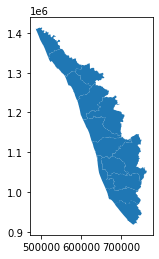

In [ ]:
db2.plot()

In [ ]:
#K-Nearest Neighbor weights, we take k=5
w = weights.KNN.from_dataframe(db2, k=5)
w

In [ ]:
#row standardize the matrix
w.transform = 'R'

In [ ]:
y = np.log(db2['Active'])
y

Name
Kasaragod             4.499810
Kannur                4.779123
Wayanad               4.465908
Kozhikode             7.046647
Malappuram            5.575949
Palakkad              5.998937
Thrissur              6.459904
Idukki                5.983936
Ernakulam             8.315566
Alapuzha              6.202536
Kottayam              7.236339
Pathanamthitta        6.448889
Kollam                5.758902
Thiruvananthapuram    7.771067
Name: Active, dtype: float64

In [ ]:
db2['lag'] = weights.lag_spatial(w,y)

In [ ]:
db2.head()

,Name,District,State,geometry,Confirmed,Death,Active,lag
Name,,,,,,,,
Kasaragod,Kasaragod,KSD,Kerala,"POLYGON ((494110.214 1389748.048, 493969.205 1...",166751,1391,90,5.573313
Kannur,Kannur,KNR,Kerala,"POLYGON ((546523.469 1358998.515, 546551.526 1...",349531,4425,119,5.517450
Wayanad,Wayanad,WYD,Kerala,"POLYGON ((601197.344 1319551.833, 601588.532 1...",168540,974,87,5.580093
Kozhikode,Kozhikode,KKD,Kerala,"POLYGON ((582728.131 1304251.321, 583010.371 1...",675635,6343,1149,5.455964
Malappuram,Malappuram,MLP,Kerala,"POLYGON ((635469.763 1273913.740, 635614.110 1...",647640,6435,264,5.750104


In [ ]:
#calculate moral I
mi = esda.Moran(db2['lag'],w)    #
mi

In [ ]:
mi.I  

0.6753567650029266

In [ ]:
 #positive value spatial autocorellation with respect to covid-19 cases 
#in india it means that we have high and concentrated in a particular place

In [ ]:
#check the p vlue
mi.p_sim

0.001

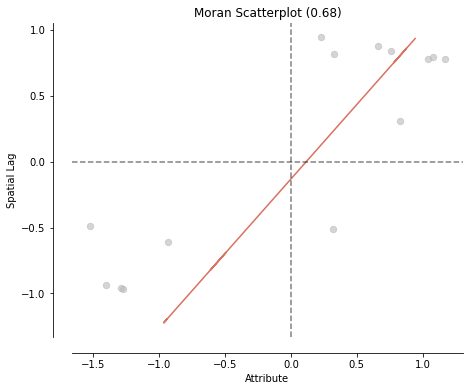

In [ ]:
#local spatial autocorellation
moran_scatterplot(mi);

In [ ]:
kl= esda.Moran_Local(db2['lag'], w)

In [ ]:
db2['significant'] = kl.p_sim <0.05  #p value less than 5
db2['quadrant'] = kl.q

In [ ]:
#p values
kl.p_sim

array([0.002, 0.002, 0.002, 0.051, 0.04 , 0.101, 0.163, 0.009, 0.016,
       0.006, 0.003, 0.005, 0.006, 0.002])

In [ ]:
db2['significant']

Name
Kasaragod              True
Kannur                 True
Wayanad                True
Kozhikode             False
Malappuram             True
Palakkad              False
Thrissur              False
Idukki                 True
Ernakulam              True
Alapuzha               True
Kottayam               True
Pathanamthitta         True
Kollam                 True
Thiruvananthapuram     True
Name: significant, dtype: bool

In [ ]:
db2['quadrant']

Name
Kasaragod             3
Kannur                3
Wayanad               3
Kozhikode             3
Malappuram            3
Palakkad              4
Thrissur              1
Idukki                1
Ernakulam             1
Alapuzha              1
Kottayam              1
Pathanamthitta        1
Kollam                1
Thiruvananthapuram    1
Name: quadrant, dtype: int32

In [ ]:
#with these 2 element"significant and quadrant",we can build a typical LISA cluster map combining the mapping skills.

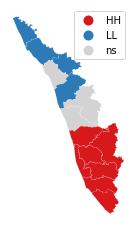

In [ ]:
#The LISA cluster will look at the value of the given area and 
#the values of its neighbors and decides if it corresponds to a bright blue, 
#pale blue, pale red, bright red or grey colour.
lisa_cluster(kl, db2);